### Heaviside Function (Step Function) Interpolations

#### The step function is described here as the following:
#### For $x > 0; y = 1$  , for   $ x < 0; y = -1$ , else $ y = 0$

#### The step function can also be created using interpolations of data, for different kinds of methods

In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange, interp1d, CubicSpline, CubicHermiteSpline
from scipy.misc import derivative
from numpy import sqrt, sin, cos, pi, abs, arctan,tan, linspace, polyfit

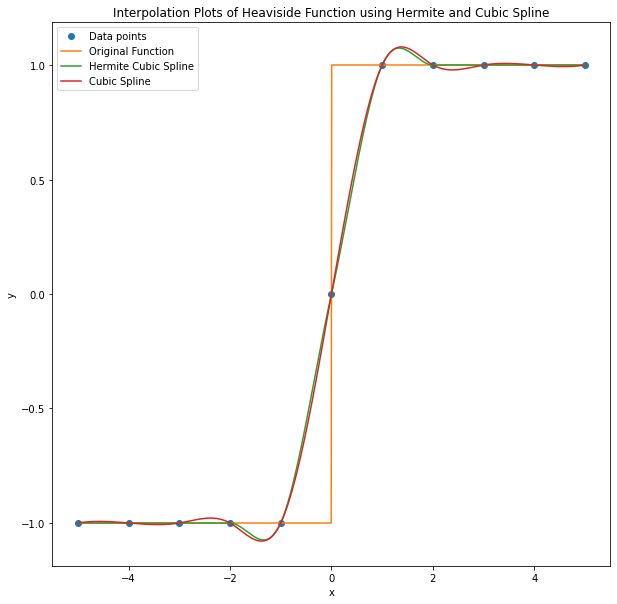

In [7]:
# create the step function for a given vector x for a given range
def step(x):
    # input: the x vector used for the creating the step function for a given range
    # Value chosen at the range of [-10,10] with intervals the size of 1 for an example
    
    y = []
    
    for num in x:
        if num > 0:
            y.append(1) # if x > 0 -> y = 1
        elif num < 0: 
            y.append(-1) # if x < 0 -> y = -1
        else:
            y.append(0) # if x = 0 -> y = 0
    
    # return the y values with the numpy array type
    return np.array(y)

x = np.arange(-5,6,1)
y = step(x)

# create the CubicSpline interpolation
cspline = CubicSpline(x,y)

# create the derivative of the function using the method from Scipy
# Used in the Hermite Cubic Spline method
dydx = derivative(step, x)


# creatie the Hermite CubicSpline interpolation
hermite = CubicHermiteSpline(x, y, dydx)

# set a new vector with 1000 points in the range of [-10,10], for the interpolations
x_new = np.linspace(-5,5,1000)

# Plot the Step function
plt.figure(figsize = (10,10))
plt.plot(x, y, 'o', x_new, f(x_new), x_new, hermite(x_new), x_new, cspline(x_new))
plt.legend(['Data points', 'Original Function', 'Hermite Cubic Spline', 'Cubic Spline'], loc ='upper left')
plt.title('Interpolation Plots of Heaviside Function using Hermite and Cubic Spline')
plt.xlabel('x')
plt.ylabel('y')
plt.show()